In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../data/external/data.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

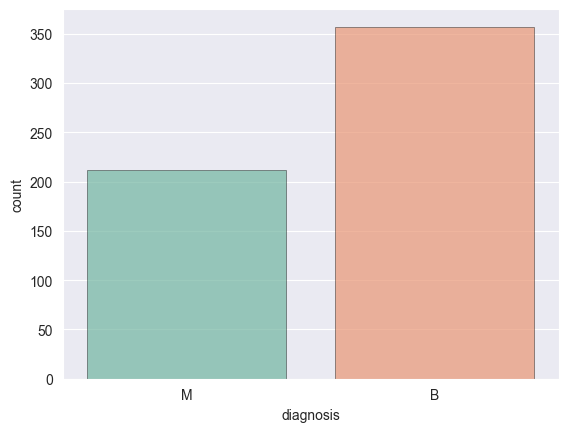

In [4]:
sns.countplot(
    data=df,
    x='diagnosis',
    palette='Set2',
    alpha=.7,
    edgecolor='black',
    linewidth=.4
)

## undersampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)

In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [7]:
"""
Undersample the majority class of the dataset using RandomUnderSampler from imblearn library.
This is done to balance the dataset and avoid the model to be biased towards the majority class.
The undersampled dataset is saved in X_over and y_over variables.
"""

X_over, y_over = under_sampler.fit_resample(X, y)
X_over.shape, y_over.shape

((424, 30), (424,))

<Axes: xlabel='diagnosis', ylabel='count'>

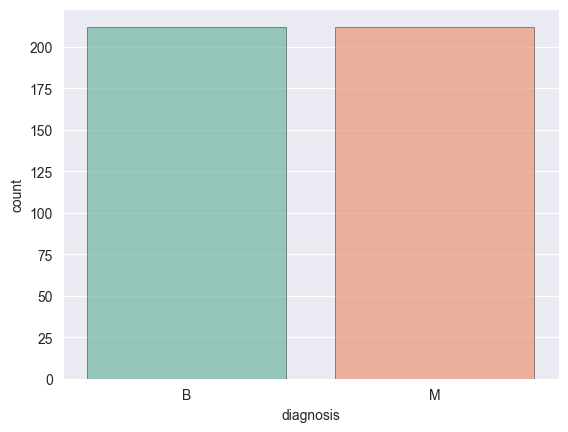

In [8]:
sns.countplot(
    x=y_over,
    palette='Set2',
    alpha=.7,
    edgecolor='black',
    linewidth=.4
)

## Data transformation

In [9]:
y_over = y_over.map({'M': 1, 'B': 0})
y_over.value_counts()

diagnosis
0    212
1    212
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((339, 30), (339,), (85, 30), (85,))

In [11]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Model 

In [12]:
p = Perceptron(max_iter=10000, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=10000)

In [13]:
predicitions_train = p.predict(X_train)
y_pred = p.predict(X_test)

In [14]:
train_score = accuracy_score(y_train, predicitions_train)
print(f'Train score: {train_score}')

Train score: 0.9734513274336283


In [15]:
test_score = accuracy_score(y_test, y_pred)
print(f'Test score: {test_score}')

Test score: 0.9882352941176471


In [16]:
print(f'Acuracy of Perceptron model: {round(p.score(X_test, y_test), 2)}')

Acuracy of Perceptron model: 0.99


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.99        37

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85



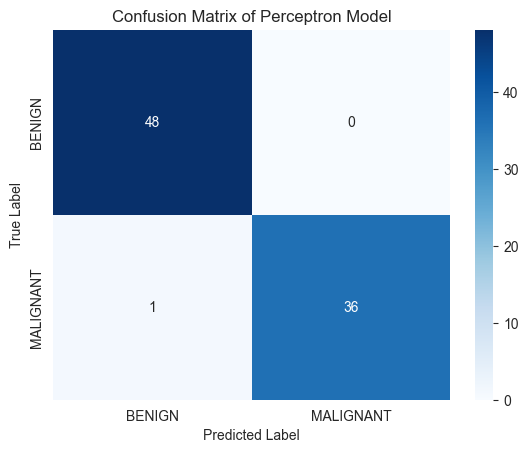

In [18]:
sns.heatmap(
    data=confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['BENIGN', 'MALIGNANT'],
    yticklabels=['BENIGN', 'MALIGNANT']
)

plt.title('Confusion Matrix of Perceptron Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
import joblib

# Save the model as a pickle in a file
joblib.dump(p, '../models/perceptron_classifier.pkl')

['../models/perceptron_classifier.pkl']

In [20]:
import session_info

session_info.show(html=True, dependencies=True)